In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from pyvirchow.io import WSIReader
from pyvirchow.morphology import TissuePatch
from pyvirchow.io.operations import get_annotation_bounding_boxes, get_annotation_polygons

Populating the interactive namespace from numpy and matplotlib


# pyvirchow: Introduction

The pyvirchow package enables easy handling of whole slide images (WSIs).
We start of describing the steps involved along with the associated code.

The starting point involves only two files:

1. A .tif containing the image
2. A .json file containing coordinates of manually annotated regions

The json file (2) is optional.


# Step 1: Extract tissue patch

In [3]:
tumor = WSIReader('../../../histopath_data/CAMELYON16/training/tumor/tumor_001.tif', 40)

Here, 40 refers to the magnification of level-0 of the WSIs, i.e.
the slide has a maximum available magnification of 40X.

To visualize a portion of the WSIs: 

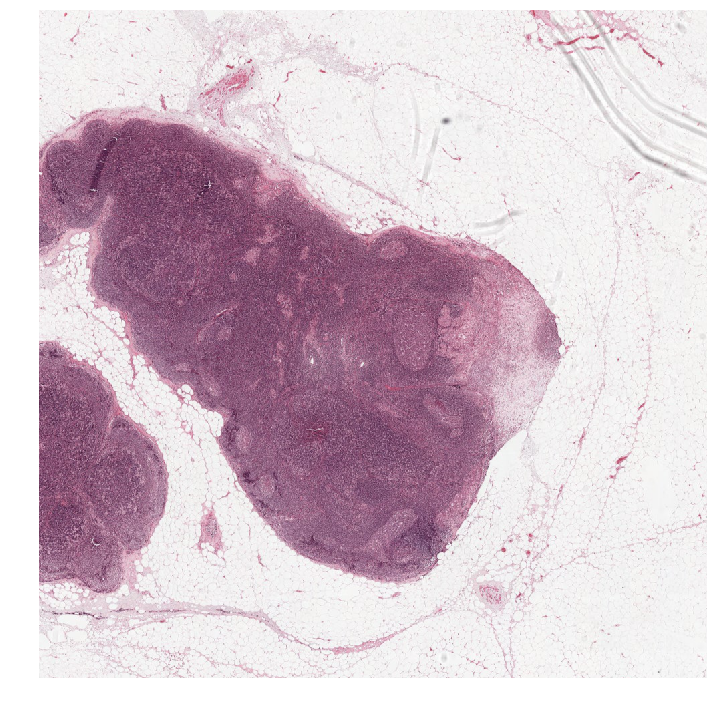

In [4]:
x0 = 51000
y0 = 110000
tumor.visualize(x0, y0, magnification=1.25, patch_size=1000)

Here, 40 refers to the magnification of level-0 of the WSIs, i.e.
the slide has a maximum available magnification of 40X.


The magnifications available then can be seen:

In [5]:
tumor.magnifications

[40.0, 20.0, 10.0, 5.0, 2.5, 1.25, 0.625, 0.3125, 0.15625, 0.078125]

To visualize a portion of the WSI, we can either specify a level or a magnification value.
Level and magnification have one to one correspondence.


| Level |  Magnification |
|-------|----------------|
|   0   |         40     |
|   1   |         20     |
|   2   |         10     |
|   3   |          5     |
|   4   |        2.5     |
|   5   |       1.25     |
|   6   |      0.625     |
|   7   |     0.3125     |
|   8   |    0.15625     |
|   9   |   0.078125     |


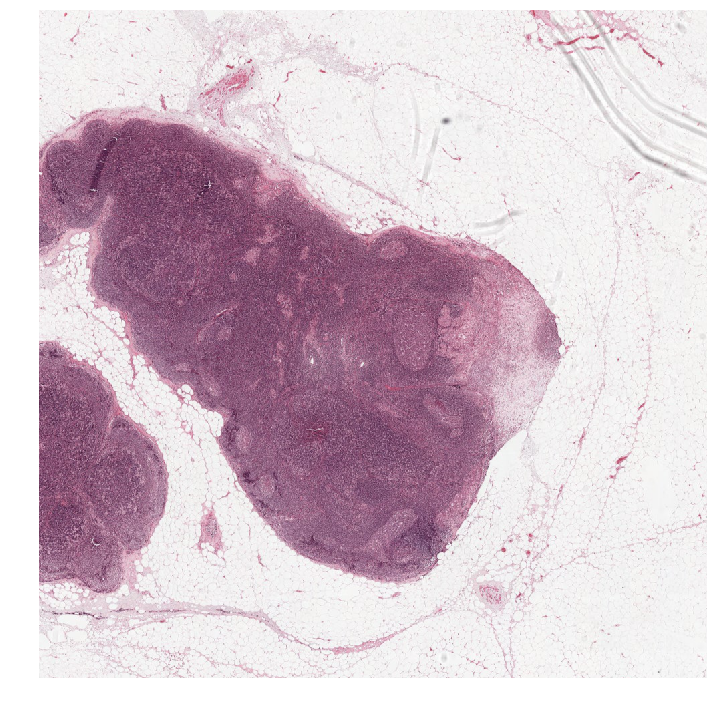

In [6]:
x0 = 51000
y0 = 110000
tumor.visualize(x0, y0, level=5,
                patch_size=1000)

Alternatively we could have specified the magnification:


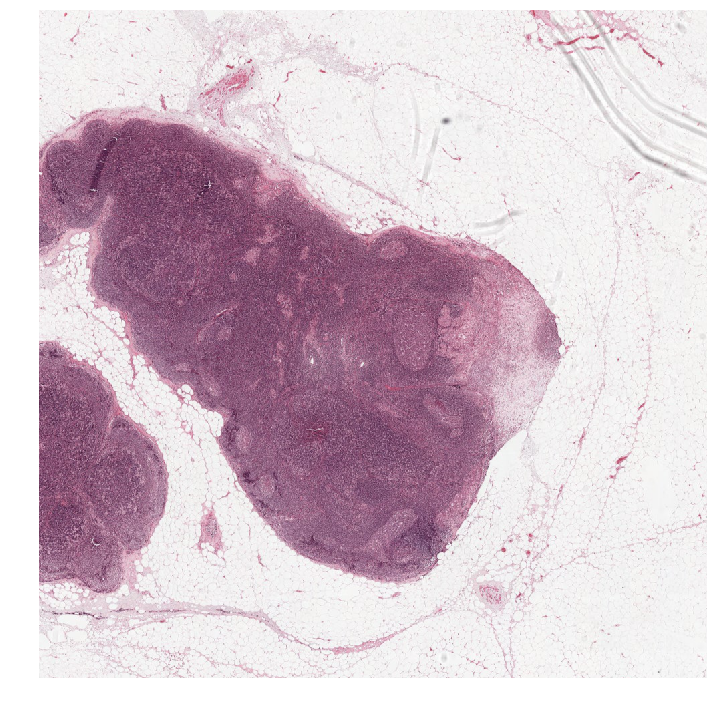

In [7]:
x0 = 51000
y0 = 110000
tumor.visualize(x0, y0, magnification=1.25,
                patch_size=1000)

# Step 2: Create tissue mask


There's a lot of white spaces that take most of the space in a WSI.
We would want to create a masked version of this image which indicates
where the tissue mass is concentrated.

We use [Otsu thresholding approach](http://www.labbookpages.co.uk/software/imgProc/otsuThreshold.html) to separate the background from the foreground. Briefly, it involves iterating through a pool of threshold values
(between 0-255, since we are already in the grayscale domain), such that the sum of the pixel level variance between foreground and background is maximum.

In the following block, we will extract these marks and indicate them 
via bounding boxes:

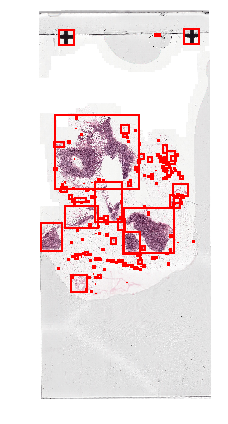

In [8]:
tumor_tissuepatch = TissuePatch(tumor, level=5)
tumor_tissuepatch.draw_contours()

We can also visualize the masked out regions:
    

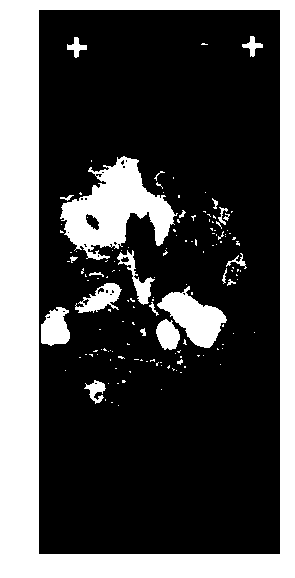

In [9]:
tumor_tissuepatch.visualize_mask()

# Step 3: Extract annotated regions

In cases where a manual annotation is available, we should be able to visualize it.
We will also want to store these regions as a binary mask in a file so that we can read them later 
directly without doing the entire processing again.


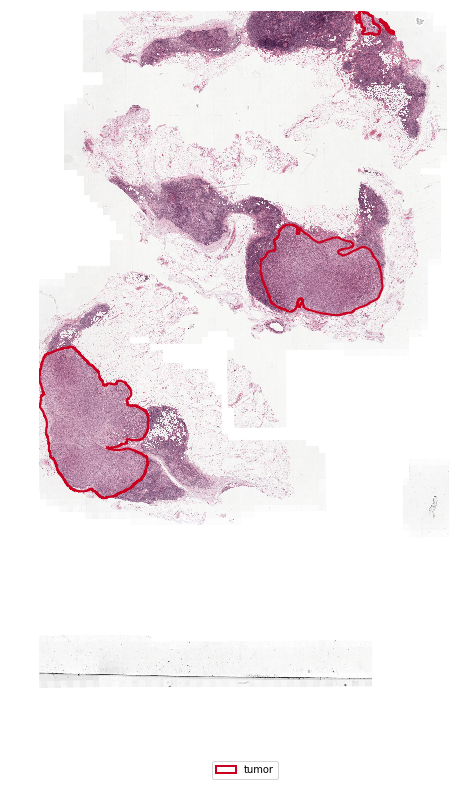

In [10]:
tumor = WSIReader('../../../histopath_data/CAMELYON16/training/tumor/tumor_009.tif', 40)
json_filepath = '../../../histopath_data/CAMELYON16/training/lesion_annotations_json/tumor_009.json'
tumor.autofocus_annotation(json_filepath, level=5)#, patch_size=1000)
#plt.savefig('presentation_images/tumor_110_annotated.pdf')

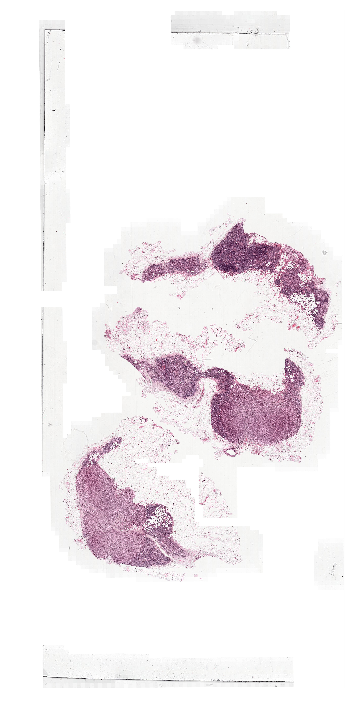

In [11]:
tumor.visualize_with_annotation(0,0,json_filepath,level=5, show_boundary=False, show_box=False)
plt.savefig('presentation_images/tumor_110_no_annotation.pdf')

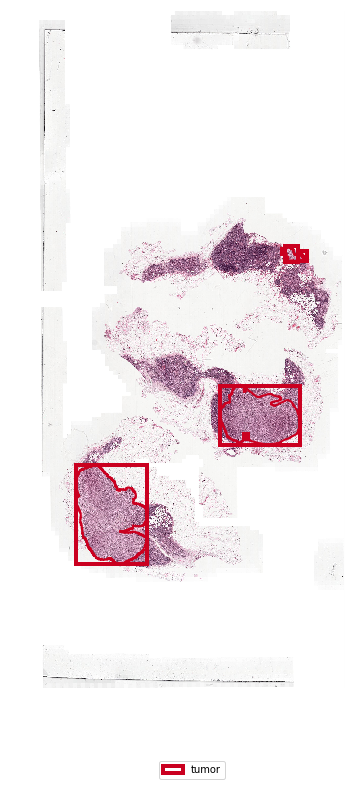

In [14]:
tumor.visualize_with_annotation(0,0,json_filepath,level=5, show_boundary=True, show_box=True)

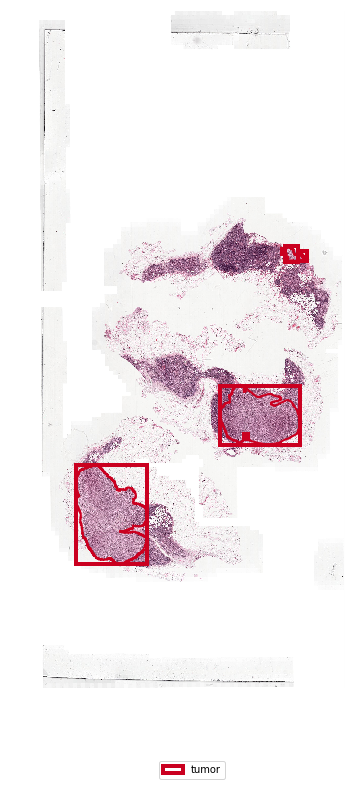

In [13]:
tumor.visualize_with_annotation(0,0,json_filepath,level=5, show_boundary=True, show_box=True)

These can also be separately visualized:

Text(0.5,1,'Regions marked as normal')

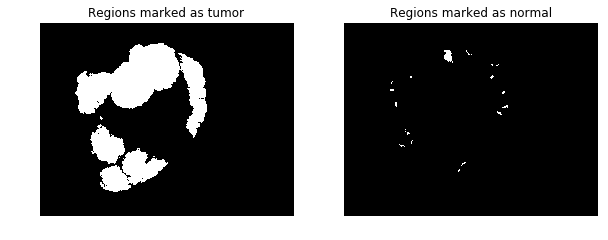

In [13]:
tumor_mask, normal_mask, combined_mask = tumor.annotation_masked(json_filepath, level=5)

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(121)
ax.set_axis_off()
ax.imshow(tumor_mask, cmap='gray')
ax.set_title('Regions marked as tumor')

ax = plt.subplot(122)
ax.set_axis_off()
ax.imshow(normal_mask, cmap='gray')
ax.set_title('Regions marked as normal')
    

# Testing dataset

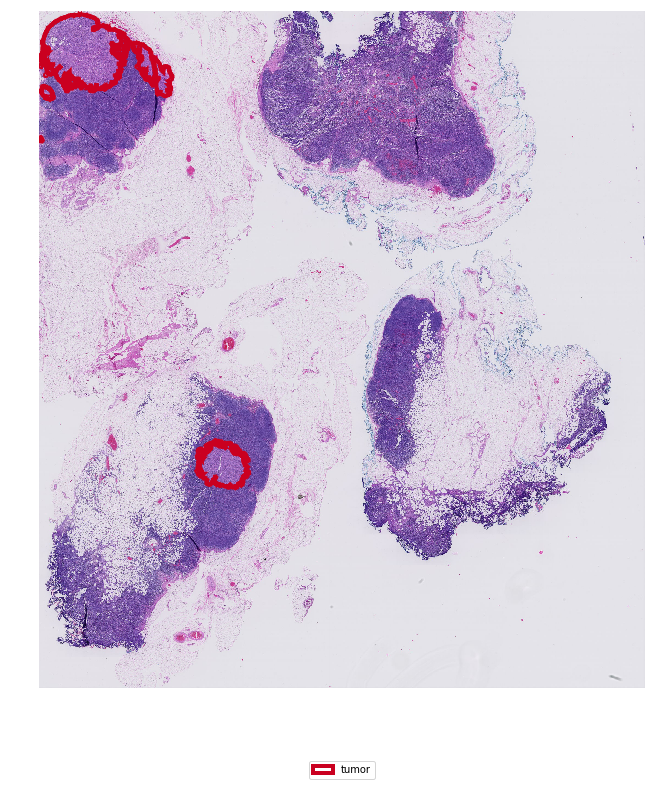

In [14]:
tumor = WSIReader('../../../histopath_data/CAMELYON16/testing/images/test_001.tif', 40)
json_filepath = '../../../histopath_data/CAMELYON16/testing/lesion_annotations_json/test_001.json'
tumor.autofocus_annotation(json_filepath, level=5)#, patch_size=1000)

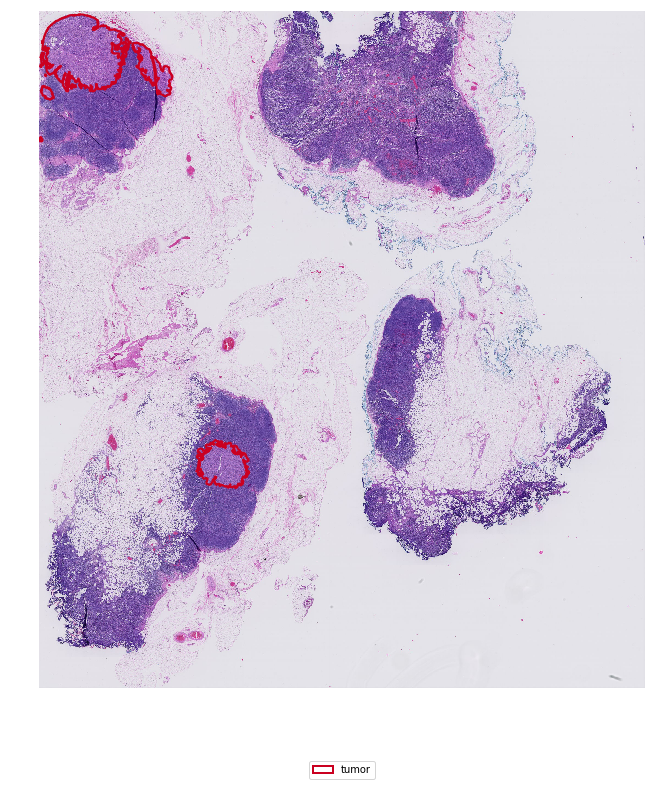

In [16]:
tumor = WSIReader('../../../histopath_data/CAMELYON16/testing/images/test_001.tif', 40)
json_filepath = '../../../histopath_data/CAMELYON16/testing/lesion_annotations_json/test_001.json'
tumor.autofocus_annotation(json_filepath, level=5)#, patch_size=1000)

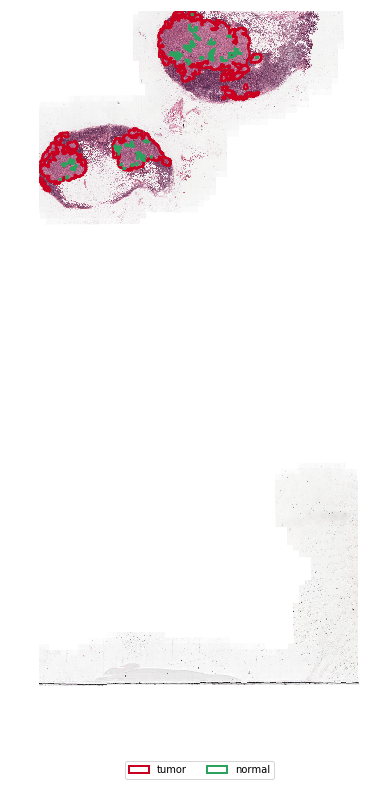

In [15]:
tumor = WSIReader('../../../histopath_data/CAMELYON16/testing/images/test_040.tif', 40)
json_filepath = '../../../histopath_data/CAMELYON16/testing/lesion_annotations_json/test_040.json'
tumor.autofocus_annotation(json_filepath, level=5)#, patch_size=1000)
